<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [1]:
# !pip install numpy
# !pip install pandas
# !pip install matplotlib
# !pip install sklearn
# !pip install seaborn

In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [3]:
# !wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

### Load Data From CSV File


In [4]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [5]:
df.shape

(346, 10)

### Convert to date time object


In [6]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [7]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [8]:
# notice: installing seaborn might takes a few minutes
# !conda install -c anaconda seaborn -y

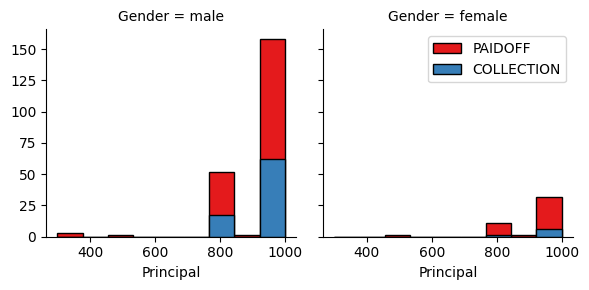

In [9]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

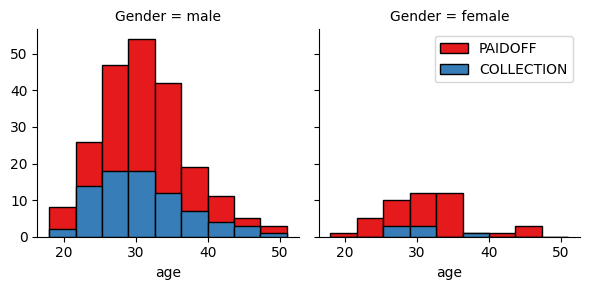

In [10]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


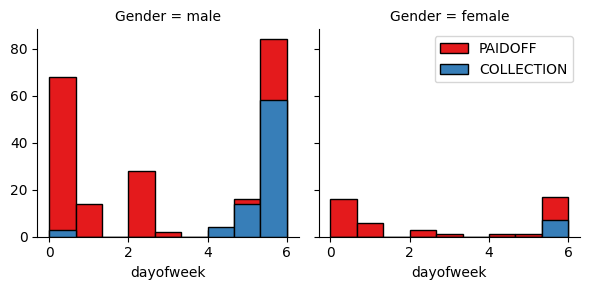

In [11]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [12]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [13]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [14]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [15]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [16]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [17]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature Selection


Let's define feature sets, X:


In [18]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?


In [19]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

### <font color='blue'>Additional: Convert Categorical features to numerical values</font>

Replacing string attributes ("PAIDOFF" and "COLLECTION") in variable 'loan_status'  with integersh 0 and 1:

##### PAIDOFF = 1
##### COLLECTION = 0

In [20]:
df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[1,0],inplace=True)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,1,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,1,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,1,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,1,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,1,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [21]:
y = df['loan_status'].values
y[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

### <font color='blue'>Train Test Split</font>

Splitting the dataset into training and testing sets respectively, which are mutually exclusive. 

Objective: Training with the training set and testing with the testing set. This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that has been used to train the model. It is more realistic for the real world problems.

In [22]:
# I. Import train_text_split
from sklearn.model_selection import train_test_split

# II. Define test_size and radnom_state
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=5) # = Test-size: 40% 

# III. Print results (amount of rows in test and train set)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (207, 8) (207,)
Test set: (139, 8) (139,)


In [23]:
display(X_train.shape, y_train.shape)
display(X_test.shape, y_test.shape)

(207, 8)

(207,)

(139, 8)

(139,)

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [24]:
# Using the function below instead (separatinrg X_train and X_test)
# X= preprocessing.StandardScaler().fit(X).transform(X)
# X[0:5]

In [25]:
X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train)
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test)
X_train[0:5]

array([[ 0.52533066, -0.97207061,  0.53495582, -0.45109685,  0.85993942,
         2.76134025, -0.86846836, -0.91206272],
       [ 0.52533066,  0.91317564, -0.47326137,  2.21681883,  0.85993942,
        -0.36214298, -0.86846836,  1.09641582],
       [ 0.52533066,  0.91317564, -0.13718897, -0.45109685,  0.85993942,
        -0.36214298,  1.15145243, -0.91206272],
       [ 0.52533066,  0.91317564, -0.64129757, -0.45109685,  0.85993942,
        -0.36214298, -0.86846836,  1.09641582],
       [ 0.52533066, -0.97207061, -0.47326137,  2.21681883, -1.16287262,
        -0.36214298, -0.86846836,  1.09641582]])

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor (KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


### 1. Import required libraries

We import the required libraries from sklaern to identify the k-nearest neighbors. 

In [26]:
# Classifier implementing the k-nearest neighbors vote.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

### 3. Training the model (k=4)

We train the model by using based on the train set. We determine k manually.

In [27]:
# Define variables

X_train_knn = X_train
X_test_knn = X_test
y_train_knn = y_train
y_test_knn = y_test

# We start with k = 4
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train_knn,y_train_knn)
neigh

KNeighborsClassifier(n_neighbors=4)

### 4. Prediction

We use the model to make predictions on the test set.

In [28]:
yhat = neigh.predict(X_test_knn)
yhat[0:5]

yhat_knn = yhat

### 5. Accuracy evaluation

In multilabel classification, accuracy classification score is a function that computes subset accuracy. This function is equal to the jaccard_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.

In [29]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train_knn, neigh.predict(X_train_knn)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test_knn, yhat_knn))

Train set Accuracy:  0.8260869565217391
Test set Accuracy:  0.6187050359712231


### 6. Training the model (k=6)

In [30]:
k = 6
neigh6_knn = KNeighborsClassifier(n_neighbors = k).fit(X_train_knn,y_train_knn)
yhat6_knn = neigh6_knn.predict(X_test_knn)
print("Train set Accuracy: ", metrics.accuracy_score(y_train_knn, neigh6_knn.predict(X_train_knn)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test_knn, yhat6_knn))

Train set Accuracy:  0.8357487922705314
Test set Accuracy:  0.6187050359712231


### 7. What about other K?

K in KNN, is the number of nearest neighbors to examine. It is supposed to be specified by the user. So, how can we choose right value for K?
The general solution is to reserve a part of your data for testing the accuracy of the model. Then choose k =1, use the training part for modeling, and calculate the accuracy of prediction using all samples in your test set. Repeat this process, increasing the k, and see which k is the best for your model.

We can calculate the accuracy of KNN for different values of k.

In [31]:
Ks = 25
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train_knn,y_train_knn)
    yhat_knn=neigh.predict(X_test_knn)
    mean_acc[n-1] = metrics.accuracy_score(y_test_knn, yhat_knn)

    
    std_acc[n-1]=np.std(yhat_knn==y_test_knn)/np.sqrt(yhat.shape[0])

mean_acc

array([0.64748201, 0.61870504, 0.66906475, 0.61870504, 0.69064748,
       0.61870504, 0.65467626, 0.65467626, 0.64028777, 0.64748201,
       0.69784173, 0.69784173, 0.69064748, 0.6618705 , 0.66906475,
       0.65467626, 0.6618705 , 0.66906475, 0.67625899, 0.69784173,
       0.70503597, 0.70503597, 0.71942446, 0.70503597])

### 8. Plot the model accuracy for a different number of neighbors

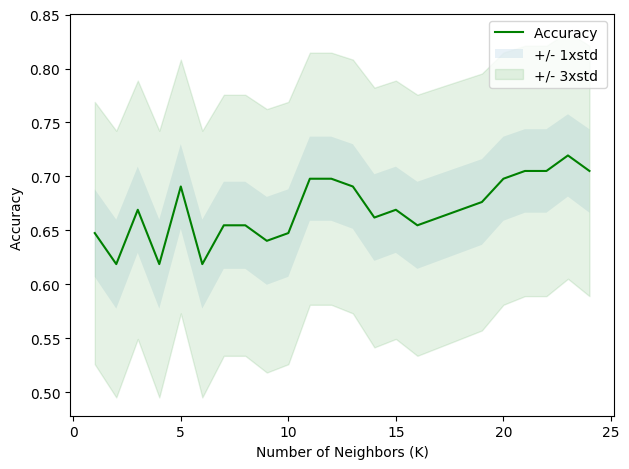

In [32]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

### 9. Print k with the best accuracy 

In [33]:
print( "The best accuracy was with", mean_acc.max(), "with k =", mean_acc.argmax()+1) 

The best accuracy was with 0.7194244604316546 with k = 23


### 10. Training the model with mean_acc.max() => k=24

In [34]:
# mean_acc.max() => k = 24
clf_KNN = KNeighborsClassifier(n_neighbors = 24).fit(X_train_knn,y_train_knn)
yhat24_knn = clf_KNN.predict(X_test_knn)
print("Train set Accuracy: ", metrics.accuracy_score(y_train_knn, clf_KNN.predict(X_train_knn)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test_knn, yhat24_knn))

Train set Accuracy:  0.748792270531401
Test set Accuracy:  0.7050359712230215


# Decision Tree


### 1. Train Test Split
Splitting the dataset into training and testing sets respectively, which are mutually exclusive.

Objective: Training with the training set and testing with the testing set. This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that has been used to train the model. It is more realistic for the real world problems.

In [35]:
# Splitting: see K Nearest Neighbor (KNN)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (207, 8) (207,)
Test set: (139, 8) (139,)


### 2. Import required libraries
We import the required libraries from sklaern to build the decision tree.

In [36]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

### 3. Modeling¶
We will first create an instance of the DecisionTreeClassifier called loanstatusTree.
Inside of the classifier, specify criterion="entropy" so we can see the information gain of each node.

In [37]:
loanstatusTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
loanstatusTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

Next, we will fit the data with the training feature matrix X_trainset and training response vector y_trainset.

In [38]:
loanstatusTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

### 4. Prediction
We make some predictions on the testing dataset and store it into a variable called predTree.

In [39]:
predTree = loanstatusTree.predict(X_test)

We print out predTree and y_test to visually compare the predictions to the actual values.

In [40]:
print (predTree [0:5])
print (y_test [0:5])

[0 1 1 0 1]
[1 0 1 0 1]


### 5. Evaluation
Next, we import metrics from sklearn and check the accuracy of our model.

In [41]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.6402877697841727


**Accuracy classification score** computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.

In multilabel classification, the function returns the subset accuracy. If the entire set of predicted labels for a sample strictly matches with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

### 6. Visualization

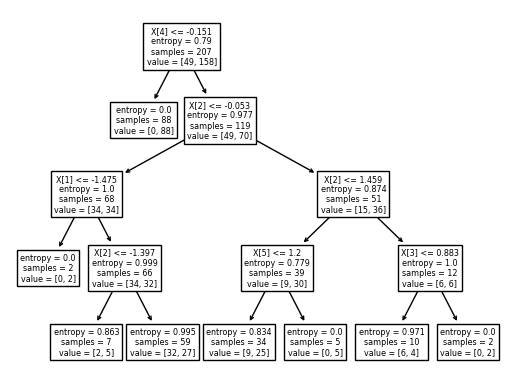

In [42]:
tree.plot_tree(loanstatusTree)
plt.show()

In [43]:
clf_DT = DecisionTreeClassifier(criterion = 'entropy').fit(X_train, y_train)
clf_DT

DecisionTreeClassifier(criterion='entropy')

# Support Vector Machine


In [44]:
df.dtypes

Unnamed: 0.1               int64
Unnamed: 0                 int64
loan_status                int64
Principal                  int64
terms                      int64
effective_date    datetime64[ns]
due_date          datetime64[ns]
age                        int64
education                 object
Gender                     int64
dayofweek                  int64
weekend                    int64
dtype: object

In [45]:
df = df[pd.to_numeric(df['loan_status'], errors='coerce').notnull()]
df['loan_status'] = df['loan_status'].astype('int')

# df = df[pd.to_numeric(df['effective_date'], errors='coerce').notnull()]
# df['effective_date'] = df['effective_date'].astype('int')

# df = df[pd.to_numeric(df['due_date'], errors='coerce').notnull()]
# df['due_date'] = df['due_date'].astype('int')

df = df[pd.to_numeric(df['education'], errors='coerce').notnull()]
df['education'] = df['education'].astype('int')

df.dtypes

Unnamed: 0.1               int64
Unnamed: 0                 int64
loan_status                int32
Principal                  int64
terms                      int64
effective_date    datetime64[ns]
due_date          datetime64[ns]
age                        int64
education                  int32
Gender                     int64
dayofweek                  int64
weekend                    int64
dtype: object

### 1. Train Test Split
Splitting the dataset into training and testing sets respectively, which are mutually exclusive.

Objective: Training with the training set and testing with the testing set. This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that has been used to train the model. It is more realistic for the real world problems.

In [46]:
# Splitting: see K Nearest Neighbor (KNN)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (207, 8) (207,)
Test set: (139, 8) (139,)


### 2. Import requrired libraries

We import the required libraries from sklaern to use the SVM algorithm

In [47]:
from sklearn import svm

### 3. Modeling

The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:

1.Linear
2.Polynomial
3.Radial basis function (RBF)
4.Sigmoid
Each of these functions has its characteristics, its pros and cons, and its equation, but as there's no easy way of knowing which function performs best with any given dataset. We usually choose different functions in turn and compare the results. Let's just use the default, RBF (Radial Basis Function) for this lab.

In [48]:
clf_SVM = svm.SVC(kernel='rbf')
clf_SVM.fit(X_train, y_train) 

SVC()

After being fitted, the model can then be used to predict new values:

In [49]:
yhat_SVM = clf_SVM.predict(X_test)
yhat_SVM [0:5]

array([1, 1, 1, 1, 1], dtype=int64)

### 4. Evaluation

In [50]:
# Import required libraries
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [51]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [52]:
# Compute confusion matrix
# cnf_matrix = confusion_matrix(y_test, yhat_SVM, labels=[2,4])
# np.set_printoptions(precision=2)

# print (classification_report(y_test, yhat_SVM))

# Plot non-normalized confusion matrix
# plt.figure()
# plot_confusion_matrix(cnf_matrix, classes=[0,1],normalize= False,  title='Confusion matrix')

### 5. F1-Score

Using the f1_score from sklearn library:

In [53]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat_SVM, average='weighted') 

0.6211528702349324

### 6. Jaccard Index

We use  as well the jaccard index for accuracy:

In [54]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat_SVM,pos_label=0)

0.0

### 7. Rebuid the model with a __linear__ kernel

We can use __kernel='linear'__ option, when we define the svm. How the accuracy changes with the new kernel function?

In [55]:
clf2 = svm.SVC(kernel='linear')
clf2.fit(X_train, y_train) 
yhat2 = clf2.predict(X_test)
print("Avg F1-score: %.4f" % f1_score(y_test, yhat2, average='weighted'))
print("Jaccard score: %.4f" % jaccard_score(y_test, yhat2,pos_label=0))

Avg F1-score: 0.6212
Jaccard score: 0.0000


# Logistic Regression


### 1. Train Test Split
Splitting the dataset into training and testing sets respectively, which are mutually exclusive.

Objective: Training with the training set and testing with the testing set. This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that has been used to train the model. It is more realistic for the real world problems.

In [56]:
# Splitting: see K Nearest Neighbor (KNN)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (207, 8) (207,)
Test set: (139, 8) (139,)


### 2. Import requrired libraries

We import the required libraries from sklaern to use the Logistic Regression algorithm

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

### 3. Modeling

Let's build our model using LogisticRegression from the Scikit-learn package. This function implements logistic regression and can use different numerical optimizers to find parameters, including ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers. You can find extensive information about the pros and cons of these optimizers if you search it in the internet.

The version of Logistic Regression in Scikit-learn, support regularization. Regularization is a technique used to solve the overfitting problem of machine learning models. C parameter indicates inverse of regularization strength which must be a positive float. Smaller values specify stronger regularization. Now let's fit our model with train set:

In [58]:
clf_LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
clf_LR

LogisticRegression(C=0.01, solver='liblinear')

Now we can predict using our test set:

In [59]:
clf_yhat = clf_LR.predict(X_test)
clf_yhat

array([0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1], dtype=int64)

predict_proba returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 0, P(Y=0|X), and second column is probability of class 1, P(Y=1|X):

In [60]:
yhat_prob = clf_LR.predict_proba(X_test)
# yhat_prob

### 4. Evaluation

### jaccard index

Let's try the jaccard index for accuracy evaluation. we can define jaccard as the size of the intersection divided by the size of the union of the two label sets. If the entire set of predicted labels for a sample strictly matches with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

In [61]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, clf_yhat,pos_label=0)

0.08888888888888889

### confusion matrix

Another way of looking at the accuracy of the classifier is to look at **confusion matrix**.

In [62]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[0,1]))

[[14 23]
 [30 72]]


Confusion matrix, without normalization
[[94  8]
 [33  4]]


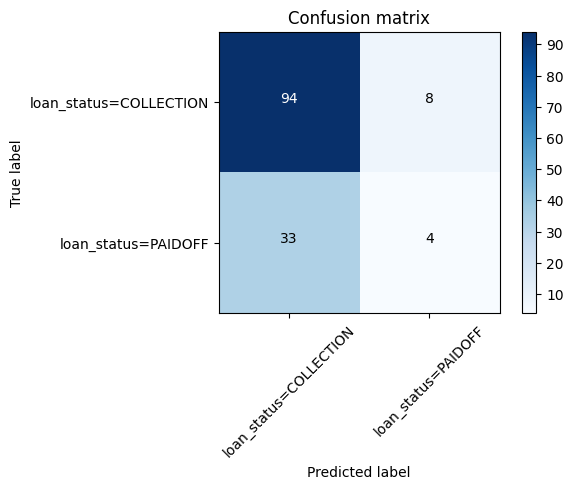

In [63]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, clf_yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['loan_status=COLLECTION','loan_status=PAIDOFF'],normalize= False,  title='Confusion matrix')

In [64]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.32      0.38      0.35        37
           1       0.76      0.71      0.73       102

    accuracy                           0.62       139
   macro avg       0.54      0.54      0.54       139
weighted avg       0.64      0.62      0.63       139



### log loss

Now, let's try **log loss** for evaluation. In logistic regression, the output can be the probability of customer churn is yes (or equals to 1). This probability is a value between 0 and 1.
Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1.

In [65]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.5898068421448249

### 5. Practice
Try to build Logistic Regression model again for the same dataset, but this time, use different __solver__ and __regularization__ values? What is new __logLoss__ value?

In [66]:
LR2 = LogisticRegression(C=0.01, solver='sag').fit(X_train,y_train)
yhat_prob2 = LR2.predict_proba(X_test)
print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob2))

LogLoss: : 0.54


# Model Evaluation using Test set


In [67]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:


In [68]:
# !wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

### Load Test set for evaluation


In [69]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


# <font color='blue'>Test Data Pre-processing: Feature selection/extraction same as done with train data</font>

### Convert to date time object

In [70]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male


In [71]:
test_df['loan_status'].value_counts()

PAIDOFF       40
COLLECTION    14
Name: loan_status, dtype: int64

### Creating column weekend

In [72]:
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male,6,1


## Convert Categorical features to numerical values

#### Replacing male and female string with 0 and 1

In [73]:
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,0,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,0,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,0,6,1


### <font color='blue'>Additional: Convert Categorical features to numerical values</font>

Replacing string attributes ("PAIDOFF" and "COLLECTION") in variable 'loan_status'  with integersh 0 and 1:

##### PAIDOFF = 1
##### COLLECTION = 0

In [74]:
test_df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[1,0],inplace=True)

## One Hot Encoding

### Creating dummies and dropping one column

In [75]:
X_t = test_df[['Principal','terms','age','Gender','weekend']]
X_t = pd.concat([X_t,pd.get_dummies(test_df['education'])], axis=1)
X_t.drop(['Master or Above'], axis = 1,inplace=True)
X_t.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


### Feature Selection

In [76]:
X_t= preprocessing.StandardScaler().fit(X_t).transform(X_t)
X_t[0:5]

array([[ 0.49,  0.93,  3.06,  1.98, -1.3 ,  2.4 , -0.8 , -0.86],
       [-3.56, -1.7 ,  0.53, -0.51,  0.77, -0.42, -0.8 , -0.86],
       [ 0.49,  0.93,  1.88,  1.98,  0.77, -0.42,  1.25, -0.86],
       [ 0.49,  0.93, -0.98, -0.51,  0.77, -0.42, -0.8 ,  1.16],
       [-0.67, -0.79, -0.48, -0.51,  0.77,  2.4 , -0.8 , -0.86]])

In [77]:
y_t = test_df['loan_status'].values
y_t[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


## I. Import required libraries

In [78]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

## II. Store intermediate result in np-array

In [79]:
Jaccard = np.full(4, np.nan)
F1_score = np.full(4, np.nan)
LogLoss = np.full(4, np.nan)
Algorithm = np.array(4)
Algorithm = ["KNN", "Decision Tree", "SVM", "LogisticRegression"]

## III. Results

### <font color='red'>A. K Nearest Neighbor (KNN) - Jaccard-Index and F1-Score</font>

#### A. Jaccard-Index

In [80]:
Jaccard[0] = jaccard_score(y_t, clf_KNN.predict(X_t))
Jaccard[0]

0.7551020408163265

#### B. F1-score

In [81]:
F1_score[0] = f1_score(y_t, clf_KNN.predict(X_t))
F1_score[0]

0.8604651162790697

### <font color='red'>B. Decision Tree - Jaccard-Index and F1-Score</font>

#### A. Jaccard-Index

In [82]:
Jaccard[1] = jaccard_score(y_t, clf_DT.predict(X_t))
Jaccard[1]

0.6326530612244898

#### B. F1-score

In [83]:
F1_score[1] = f1_score(y_t, clf_DT.predict(X_t))
F1_score[1]

0.775

### <font color='red'>C. SVM - Jaccard-Index and F1-Score</font>

#### A. Jaccard-Index

In [84]:
Jaccard[2] = jaccard_score(y_t, clf_SVM.predict(X_t))
Jaccard[2]

0.7692307692307693

#### B. F1-score

In [85]:
F1_score[2] = f1_score(y_t, clf_SVM.predict(X_t))
F1_score[2]

0.8695652173913044

### <font color='red'>D. Logistic Regression - Jaccard-Index, F1-Score and LogLoss</font>

#### A. Jaccard-Index

In [86]:
Jaccard[3] = jaccard_score(y_t, clf_LR.predict(X_t))
Jaccard[3]

0.7692307692307693

#### B. F1-score

In [87]:
F1_score[3] = f1_score(y_t, clf_LR.predict(X_t))
F1_score[3]

0.8695652173913044

#### C. LogLoss

In [88]:
LogLoss[3] = log_loss(y_t, clf_LR.predict_proba(X_t))
LogLoss[3]

0.5732246198796146

# <font color='green'>Report</font>

You should be able to report the accuracy of the built model using different evaluation metrics:


In [89]:
Report = pd.DataFrame({"Jaccard":Jaccard, "F1-score":F1_score, "LogLoss":LogLoss}, index=Algorithm)

In [90]:
Report

,Jaccard,F1-score,LogLoss
KNN,0.755102,0.860465,NaN
Decision Tree,0.632653,0.775000,NaN
SVM,0.769231,0.869565,NaN
LogisticRegression,0.769231,0.869565,0.573225


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
